# #QuarentenaDados

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 

import warnings
warnings.filterwarnings('ignore')

random.seed(100)
sns.set()
plt.rcParams['figure.figsize'] = 12,6
plt.rcParams.update({'font.size': 15})

## Reading [ENEM](http://portal.inep.gov.br/web/guest/microdados) data

In [2]:
path = os.path.abspath('../Files/MICRODADOS_ENEM_2018_SAMPLE_43278.csv')

enem_data = pd.read_csv(path)
enem_data

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.0,M,1.0,1,...,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.0,M,0.0,1,...,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.0,F,0.0,2,...,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.0,F,0.0,2,...,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.0,M,0.0,3,...,A,B,A,A,D,B,B,B,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137839,180012079549,2018,4202305,Biguaçu,42,SC,21.0,F,0.0,1,...,B,B,A,B,C,A,A,B,A,A
137840,180008900183,2018,2111300,São Luís,21,MA,22.0,F,0.0,1,...,A,B,A,A,B,A,A,A,A,A
137841,180013130388,2018,2208650,Queimada Nova,22,PI,18.0,M,0.0,3,...,A,B,B,A,C,A,B,B,A,A
137842,180009618129,2018,2805703,Propriá,28,SE,28.0,F,0.0,1,...,A,C,B,A,C,A,A,B,D,A


In [3]:
print(enem_data.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

### Challenge 1 by [Thais André](https://twitter.com/thais_tandre)

If the person was not present, fill in their note with some number. The grade 0? The average grade? The median?

In [4]:
# Creating a DataFrame with only the grades in each test
grades_data = enem_data[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]
grades_data.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,NaN,NaN,NaN,NaN,NaN
1,523.1,671.3,661.6,738.0,680.0
2,409.2,531.7,389.0,438.1,600.0
3,452.3,505.5,448.5,544.9,400.0
4,NaN,NaN,NaN,NaN,NaN


In [5]:
enem_data[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].isnull().sum()

NU_NOTA_CN         40307
NU_NOTA_CH         34070
NU_NOTA_LC         34070
NU_NOTA_MT         40307
NU_NOTA_REDACAO    34070
dtype: int64

In [6]:
enem_data[['TP_PRESENCA_CH', 'TP_PRESENCA_CN', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'TP_STATUS_REDACAO']].head()

,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_STATUS_REDACAO
0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,NaN


In [7]:
grades_data = grades_data.fillna(0)
grades_data.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,0.0,0.0,0.0,0.0,0.0
1,523.1,671.3,661.6,738.0,680.0
2,409.2,531.7,389.0,438.1,600.0
3,452.3,505.5,448.5,544.9,400.0
4,0.0,0.0,0.0,0.0,0.0


### Challenge 2 by [Thiago Gonçalves](https://twitter.com/tgcsantos)

The correlation matrix is ugly, shall we make it more beautiful? :) Don't forget to keep the values inside them.

In [8]:
correlation = grades_data.corr()
correlation

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.872077,0.872657,0.959711,0.801108
NU_NOTA_CH,0.872077,1.000000,0.977646,0.859953,0.855318
NU_NOTA_LC,0.872657,0.977646,1.000000,0.861623,0.864063
NU_NOTA_MT,0.959711,0.859953,0.861623,1.000000,0.798933
NU_NOTA_REDACAO,0.801108,0.855318,0.864063,0.798933,1.000000


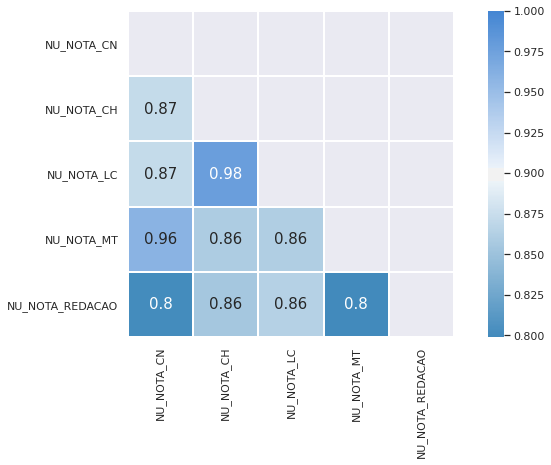

In [9]:
# Mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 250, s=80, l=55, n=9, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, annot=True, mask=mask, cmap=cmap, square=True,
           linewidths=1)

plt.show()

### Challenge 3 by [Paulo Silveira](https://twitter.com/paulo_caelum)

Pairplot of correct answers for each category (CN, CH, MT, LC, pure grade of the essay). Use feedback and responses

In [10]:
test_answers = enem_data[['TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT']].dropna()
print('Number of Student Responses:', len(test_answers))
test_answers.head()

Number of Student Responses: 97270


,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT
1,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC
2,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB
3,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA
6,BBCCAAECEACBCADDAECABCEBDDADCCEACDBCEBCAABDEB,ABBADAEAACCABAABCACBEBADCDECABCCDAECACBDDCDEB,99999EEABBDEEBAECBBACBEACBDCBDDCEBEDBDADACABCC...,CCECCBDECCEBABADBDAACEBDBBCEEACDCABAECBCABDEC
8,CEDADAADADEBBAEABCBEDEBCEBEEDCAACEADBDEBDCBDE,BEECACBAEECEBDEEADEDEDEBDBAACBBADBEADCBDAABEA,CBBDE99999ECAEBABACEEBCABBADAEACCCBAEABCCBCEAA...,BDCADDBCDBDBEBCEDADCEBBACECBAAEBDDBDCABECDADA


In [11]:
test_feedback = enem_data[['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT']].dropna()
print('Number of Feedback Responses: ', len(test_feedback))
test_feedback.head()

Number of Feedback Responses:  97270


,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT
1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD
2,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB
3,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX
6,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX
8,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA


In [12]:
len_answer = len(test_feedback['TX_GABARITO_CN'].values[0])

def count_correct_answers(feedback, answer):
    if len(feedback) != len(answer):
        raise NameError('Invalid entries')
        
    count = sum(feedback[idx] == answer[idx] for idx in range(len_answer))
    
    return count

In [13]:
counts = []

for i in range(len(test_feedback.index)):
    
    cn_grade = count_correct_answers(test_feedback['TX_GABARITO_CN'].iloc[i], 
                                     test_answers['TX_RESPOSTAS_CN'].iloc[i])
    
    ch_grade = count_correct_answers(test_feedback['TX_GABARITO_CH'].iloc[i], 
                                     test_answers['TX_RESPOSTAS_CH'].iloc[i])
    
    lc_grade = count_correct_answers(test_feedback['TX_GABARITO_LC'].iloc[i], 
                                     test_answers['TX_RESPOSTAS_LC'].iloc[i])
    
    mt_grade = count_correct_answers(test_feedback['TX_GABARITO_MT'].iloc[i], 
                                     test_answers['TX_RESPOSTAS_MT'].iloc[i])
    
    counts.append([cn_grade, ch_grade, lc_grade, mt_grade])

In [28]:
num_grades = pd.DataFrame(counts, columns=['Natural Sciences ', 'Human Sciences',
                                           'Languages and Codes', 'Mathematics'],
                         index=test_feedback.index)

num_grades.head()

,Natural Sciences,Human Sciences,Languages and Codes,Mathematics
1,11,27,30,22
2,8,9,8,6
3,7,10,10,10
6,11,9,14,8
8,8,12,15,13


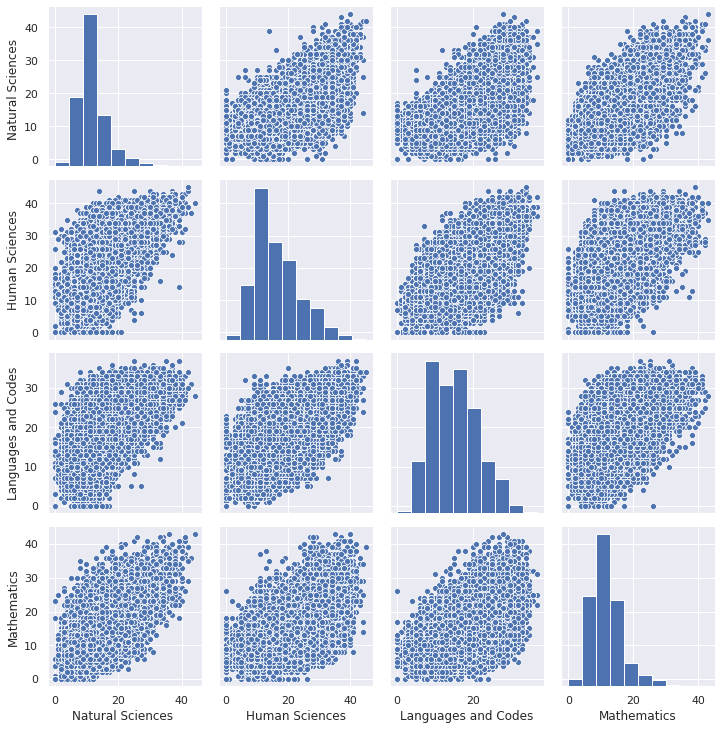

In [29]:
sns.pairplot(num_grades)
plt.show()

### Challenge 4 by [Guilherme Silveira](https://www.linkedin.com/in/guilhermeazevedosilveira/)

Remove all zeros. Take care that in challenge 1 we already make decisions related to data cleaning as well. You can also export to another CSV if you want.

In [16]:
clean_data = grades_data.copy()

In [17]:
clean_data = clean_data.replace(0, np.nan)
clean_data = clean_data.dropna()
clean_data.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,523.1,671.3,661.6,738.0,680.0
2,409.2,531.7,389.0,438.1,600.0
3,452.3,505.5,448.5,544.9,400.0
6,428.5,505.2,521.0,436.8,560.0
8,491.8,575.7,524.4,487.6,660.0


### Challenge 5 by  [Thiago Gonçalves](https://twitter.com/tgcsantos)

Which questions had the most errors (analysis on feedback x hits x errors)

In [18]:
color_data = enem_data[['CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT']].dropna()
color_data.head()

,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT
1,448.0,454.0,457.0,460.0
2,447.0,451.0,455.0,459.0
3,450.0,453.0,458.0,461.0
6,450.0,453.0,458.0,461.0
8,449.0,454.0,457.0,462.0


In [19]:
def choose_test_code(name):
    
    idx = random.randrange(0, len(color_data[f'CO_PROVA_{name}']))
    
    code = color_data[f'CO_PROVA_{name}'].iloc[idx]
    
    return code

In [20]:
def check_answers(feedback, answer):
        
    checked_answers = [int(feedback[idx] == answer[idx]) for idx in range(len(feedback))]
    
    return checked_answers

In [21]:
# Choosing a test color

code_ch = choose_test_code('CH')
code_cn = choose_test_code('CN')
code_lc = choose_test_code('LC')
code_mt = choose_test_code('MT')

In [22]:
test_feedback_mt = enem_data.query(f'CO_PROVA_MT == {code_mt}')[['TX_GABARITO_CN', 'TX_GABARITO_CH', 
                                                              'TX_GABARITO_LC', 'TX_GABARITO_MT']].dropna()

test_feedback_mt.head()

,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT
3,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX
6,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX
9,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX
11,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX
21,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX


In [23]:
test_answers_mt = enem_data.query(f'CO_PROVA_MT == {code_mt}')[['TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 
                                                             'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT']].dropna()

test_answers_mt.head()

,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT
3,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA
6,BBCCAAECEACBCADDAECABCEBDDADCCEACDBCEBCAABDEB,ABBADAEAACCABAABCACBEBADCDECABCCDAECACBDDCDEB,99999EEABBDEEBAECBBACBEACBDCBDDCEBEDBDADACABCC...,CCECCBDECCEBABADBDAACEBDBBCEEACDCABAECBCABDEC
9,ADDCEEBCDDBCADCCBCBBACDEBBACAAAADACACADEEBCEB,BEDCABBBEDEABEEDAEBBCEECBEACCEDAECEABDBDAEACE,99999BBDCCEDADEAEABDEBABABDADACDCABCECBBADABCB...,CCBDDEECBAAECCDDBDAEDBAEDDAABDBDEACBECBEAADDE
11,ADBAECCAAACBEEDABBDBACDBECADDDDEBDBEBACEBDCCE,EAACACEBBACCCCDCBEEDDDAEEEEEEDCAEBEDBEEAAECBB,99999CEBDBEBEADECBBBDBBADABACCABBBACDECBCDDACD...,BDBDCEEEABBBCADDDCBAEEACCEDACCACCABBADDAAEDBC
21,DCBDBEBEABBDACEABDDBDECCBCADBDDBAADDEDEEBEDEC,BEEBAABACACDBAECACEBBDEBBEEBEACEEAECCCBBAECAE,CDEDC99999ECACBBBECDEEBCDBAEDEDCDABCECCBABADEE...,EEEBDBADAADECBDBCDAEEBCDCDEBBDABCADBBDDCEEBDA


In [24]:
human_sciences = []
natural_sciences = []
languages = []
mathematics = []

for i in range(len(test_feedback_mt)):
    
    cn_grade = check_answers(test_feedback_mt['TX_GABARITO_CN'].iloc[i], 
                                     test_answers_mt['TX_RESPOSTAS_CN'].iloc[i])
    
    ch_grade = check_answers(test_feedback_mt['TX_GABARITO_CH'].iloc[i], 
                                     test_answers_mt['TX_RESPOSTAS_CH'].iloc[i])
    
    lc_grade = check_answers(test_feedback_mt['TX_GABARITO_LC'].iloc[i], 
                                     test_answers_mt['TX_RESPOSTAS_LC'].iloc[i])
    
    mt_grade = check_answers(test_feedback_mt['TX_GABARITO_MT'].iloc[i], 
                                     test_answers_mt['TX_RESPOSTAS_MT'].iloc[i])
    
    natural_sciences.append(cn_grade)
    human_sciences.append(ch_grade)
    languages.append(lc_grade)
    mathematics.append(mt_grade)

In [25]:
# Test results of natural sciences
natural_science = pd.DataFrame(natural_sciences)
natural_science.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
1,0,0,0,0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,1
3,1,0,0,0,1,0,0,1,0,0,...,0,0,1,1,1,1,1,0,0,0
4,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0


In [26]:
total_values = pd.DataFrame(natural_science.sum())
total_values['Question'] = total_values.index
total_values.columns = ['No Correct Answers', 'Question']

total_values.head()

,No Correct Answers,Question
0,6078,0
1,5578,1
2,2400,2
3,3891,3
4,8802,4


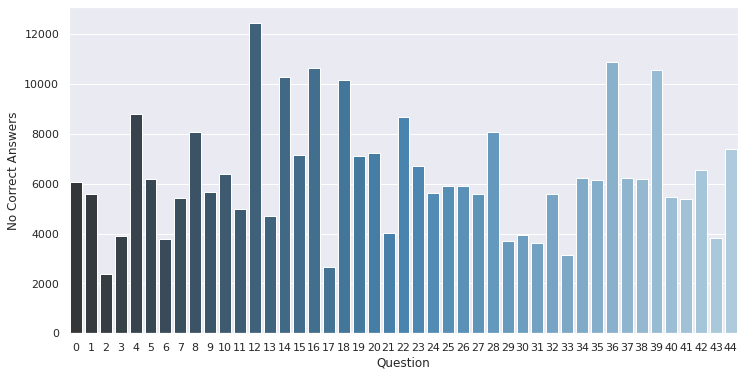

In [27]:
sns.barplot(x='Question', y='No Correct Answers', data=total_values, palette='Blues_d')
plt.show()

### Challenge 6 by [Allan Spadini](https://twitter.com/allanspadini)

Study what people studying the subject are discussing and conclusions that have already arrived on the use of information (mainly sensitive) for machine learning and data science. Podcast of the datahackers also on the subject.